This notebook loads pandas dataframes pickled in a previous notebook and describes the construction of the timeseries plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
from datetime import datetime
import pickle
from matplotlib import rcParams
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from IPython.core.display import HTML, display
from latexify import latexify

In [2]:
%matplotlib inline

In [3]:
# Global graphics setup
display(HTML("<style>.container {width: 90%}</style>"))
plot_colors = {'swf': '#000000',
               'aqua': '#348ABD',
               'aqua2': '#8000FF',
               'viirs': '#A60628',
               'mei': '#467821',
               }
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.size'] = 3
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 3
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

In [4]:
# Load the previously pickled dataframes 
with open('./pklJar/dict_df_phytoC.pkl', 'rb') as f:
    datadict = pickle.load(f)
    df_aqua = datadict['aqua']
    df_swf = datadict['swf']
    df_swf_aqua = datadict['swf_aqua']
    df_mean = datadict['mean']

In [9]:
def val_to_perc(val, mean):
    return (val - mean) / mean * 100


def val_anom_to_perc(val, mean):
    return val / mean * 100
    

def set_time_axis(ax):
    x_minorlocator = mdates.YearLocator()
    x_majorformatter = mdates.DateFormatter('%b\n%Y')
    ax.xaxis.set_minor_locator(x_minorlocator)
    ax.xaxis.set_tick_params(rotation=0)
    ax.xaxis.set_major_formatter(x_majorformatter)
    ax.set_xlabel('')


def make_ax_1(ax_c, ylabel1, ylabel2, ylims=None, ls='-', use_viirs=True, **kwargs):
    #y_majorlocator = mtick.MultipleLocator(0.02)
    #y_minorlocator = mtick.MultipleLocator(0.0025)
    lbl = kwargs.pop('lbl', 'phyto_C_mean')
    mean_val = kwargs.pop('mean_val', df_aqua[lbl].mean())
    df_swf.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color=plot_colors['swf'])
    df_aqua.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color=plot_colors['aqua'])
    if use_viirs:
        df_viirs.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color=plot_colors['viirs'])
    ax_c.set_ylabel(ylabel1)
    # ax_c.yaxis.set_major_locator(y_majorlocator)
    #ax_c.yaxis.set_minor_locator(y_minorlocator)  
    if ylims:
        ax_c.set_ylim(ylims)
    else:
        ylims = ax_c.get_ylim()
    if use_viirs:
        ax_c.legend(['SeaWiFS', 'Aqua', 'VIIRS'], loc='lower center', ncol=3);  
    else:
        ax_c.legend(['SeaWiFS', 'MODISA'], loc='lower center', ncol=2);
    if mean_val:
        ax_c.axhline(mean_val, color='k')
        ax_p = ax_c.twinx()
        ax_p.set_ylabel(ylabel2)
        ax_p.set_ylim(val_to_perc(ylims[0], mean=mean_val),
                  val_to_perc(ylims[1], mean=mean_val)
                 )
    ax_c.grid(axis='x', linestyle='--', linewidth=2)
    set_time_axis(ax_c)

    
def make_ax_2(ax, ls='-', use_viirs=True, ylims=None, lbl='phyto_C_anomaly', mean_val=df_aqua.phyto_C_mean.mean(),
             use_mei=True):
    df_swf.plot(y=lbl, marker='+', linestyle=ls, 
                color=plot_colors['swf'], ax=ax, legend=False)
    df_aqua.plot(y=lbl, marker='+', linestyle=ls,
                 ax=ax, color=plot_colors['aqua'], legend=False)
    if use_viirs:
        df_viirs.plot(y=lbl, marker='+', linestyle=ls,
                      ax=ax, color=plot_colors['viirs'], legend=False)
    if use_mei:
        df_mei.plot(y='MEI', marker='D', ax=ax,
                    color=plot_colors['mei'], linestyle='', legend=False)
    ax.axhline(linestyle='-', linewidth=1.5, color='k')
    ax.grid(axis='x', linestyle='--', linewidth=2)
    ax.set_ylabel('Phyto. C Anomaly ($mg\ m^{-3}$)') 
    if ylims:
        ax.set_ylim(ylims)
    else:
        ylims = ax.get_ylim()
    if mean_val:
        ax2 = ax.twinx()
        ax2.set_ylabel('Phyto. C Anomaly (\%)')
        ax2.set_ylim(val_anom_to_perc(ylims[0], mean=mean_val),
                     val_anom_to_perc(ylims[1], mean=mean_val))
    set_time_axis(ax)
    ax.set_xlabel('')


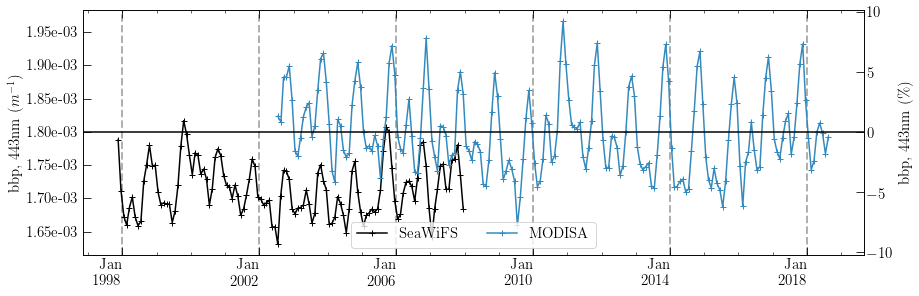

In [7]:
f, ax = pl.subplots(figsize=(14, 5))
make_ax_1(ax, ylabel1='bbp, 443nm ($m^{-1}$)', ylabel2='bbp, 443nm (\%)', use_viirs=False, lbl='bbp_443_giop_mean')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
f.savefig('../FigJar/bbp_443_timeseries.pdf', dpi=300, format='pdf')

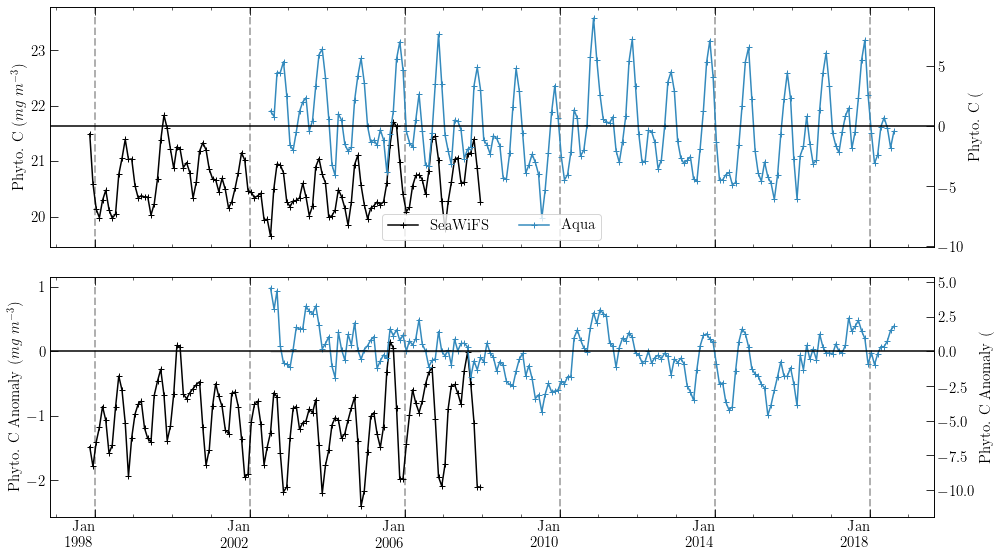

In [8]:
f, axs = pl.subplots(nrows=2, figsize=(14, 8))
make_ax_1(axs[0], ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', use_viirs=False);
make_ax_2(axs[1], use_viirs=False, use_mei=False)
axs[1].fill_between(df_swf_aqua.index.values, y1=df_swf_aqua.diff_neg, y2=df_swf_aqua.diff_pos,
                color='k', alpha=0.25)
f.tight_layout()
axs[0].legend(['SeaWiFS', 'Aqua'], loc='lower center', ncol=2); 
f.savefig('../FigJar/phyto_Ctimeseries2018_4x7.pdf')

In [63]:
df_swf.head().T

datetime,1997-11-15 22:47:10,1997-12-16 09:42:30,1998-01-16 10:37:10,1998-02-14 22:23:00,1998-03-16 11:46:40
bbp_443_giop_mean,0.001788,0.001712,0.001673,0.001660,0.001686
phyto_C_2.5%,19.804042,18.924558,18.483070,18.353762,18.609830
phyto_C_25%,20.946457,19.993809,19.562847,19.359291,19.714802
phyto_C_mean,21.490657,20.588875,20.128751,19.980316,20.291182
phyto_C_75%,22.115385,21.110110,20.657379,20.447693,20.818037
phyto_C_97.5%,23.329433,22.316328,21.795382,21.641513,21.958779
phyto_C_anomaly,-1.488190,-1.795018,-1.407020,-1.184930,-0.859675


In [64]:
df_aqua.head().T

datetime,2002-07-16 22:10:00,2002-08-19 09:03:30,2002-09-16 01:52:30,2002-10-16 13:17:30,2002-11-16 01:15:00
bbp_443_giop_mean,0.001823,0.001815,0.001882,0.001882,0.001899
phyto_C_2.5%,20.197499,20.084285,20.848132,20.842028,21.004253
phyto_C_25%,21.343615,21.245797,21.968674,21.966110,22.146285
phyto_C_mean,21.901264,21.801759,22.597096,22.594274,22.792814
phyto_C_75%,22.538910,22.434313,23.204997,23.202138,23.393081
phyto_C_97.5%,23.794579,23.661935,24.574319,24.567595,24.764797
phyto_C_anomaly,0.985239,0.658900,0.943811,0.085470,-0.186034


In [37]:
def make_ax_(ax_c, ylabel1, ylabel2, ylims=None, ls='-',**kwargs):
    #y_majorlocator = mtick.MultipleLocator(0.02)
    #y_minorlocator = mtick.MultipleLocator(0.0025)
    lbl = kwargs.pop('lbl', 'phyto_C_mean')
    draw_hpd = kwargs.pop('draw_hpd', True)
    mean_val = kwargs.pop('mean_val', df_aqua[lbl].mean())
    plot_mean_model = kwargs.pop('use_mean_df', False)
    show_legend = kwargs.pop('show_legend', True)  
    df_swf.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color='k', lw=2, zorder=2,
                legend=False)
    df_aqua.plot(y=lbl, marker='^', linestyle=ls, ax=ax_c, color='k', lw=2, zorder=2,
                legend=False)  
    if plot_mean_model:
        df_mean.plot(y='adjusted_phyto_C_mean', marker='s',
                     ax=ax_c, color='brown', lw=2, zorder=2, legend=False) 
    #ax_c.legend(['SeaWiFS', 'MODISA'], loc='lower center', ncol=2);
    if draw_hpd:
        inc_50p = kwargs.pop('inc_50p', False)
        ax_c.fill_between(df_swf.index.values, df_swf['phyto_C_97.5%'].values, 
                         df_swf['phyto_C_2.5%'].values, color=plot_colors['aqua'],
                         alpha=0.5,)
        ax_c.fill_between(df_aqua.index.values, df_aqua['phyto_C_97.5%'].values,
                         df_aqua['phyto_C_2.5%'].values, color=plot_colors['aqua2'],
                         alpha=0.3,)
                
        df_swf.plot(y='phyto_C_97.5%', color='k', #plot_colors['swf'],
                    ax=ax_c, legend=False)
        df_swf.plot(y='phyto_C_2.5%', color='k', #plot_colors['swf'],
                    ax=ax_c, legend=False)
        df_aqua.plot(y='phyto_C_97.5%', color='k', #plot_colors['aqua'],
                     ax=ax_c, legend=False)
        df_aqua.plot(y='phyto_C_2.5%', color='k', #plot_colors['aqua'],
                     ax=ax_c, legend=False) 
        if plot_mean_model:
            ax_c.fill_between(df_mean.index.values, df_mean['adj_C_97.5%'].values, 
                         df_mean['adj_C_2.5%'].values, color='brown',
                         alpha=0.5)
            df_mean.plot(y='adj_C_2.5%', color='k', ax=ax_c, legend=False)
            df_mean.plot(y='adj_C_97.5%', color='k', ax=ax_c, legend=False)
        if inc_50p:
            ax_c.fill_between(df_swf.index.values, df_swf['phyto_C_25%'].values,
                             df_swf['phyto_C_75%'].values, color=plot_colors['aqua'],
                             alpha=0.8)
            ax_c.fill_between(df_aqua.index.values, df_aqua['phyto_C_25%'].values,
                             df_aqua['phyto_C_75%'].values, color=plot_colors['aqua2'],
                             alpha=0.8)

            df_swf.plot(y='phyto_C_25%', color='k', ax=ax_c, legend=False)
            df_swf.plot(y='phyto_C_75%', color='k', ax=ax_c, legend=False)
            df_aqua.plot(y='phyto_C_25%', color='k', ax=ax_c, legend=False)
            df_aqua.plot(y='phyto_C_75%', color='k', ax=ax_c, legend=False)
            if plot_mean_model:
                ax_c.fill_between(df_mean.index.values, df_mean['adj_C_25%'].values,
                                 df_mean['adj_C_75%'].values, color='brown',
                                 alpha=0.8)
                df_mean.plot(y='adj_C_25%', color='k', ax=ax_c, legend=False)
                df_mean.plot(y='adj_C_75%', color='k', ax=ax_c, legend=False)
    ax_c.set_ylabel(ylabel1)
    # ax_c.yaxis.set_major_locator(y_majorlocator)
    #ax_c.yaxis.set_minor_locator(y_minorlocator)  
    if ylims:
        ax_c.set_ylim(ylims)
    else:
        ylims = ax_c.get_ylim()
    if mean_val:
        ax_c.axhline(mean_val, color='k')
        ax_p = ax_c.twinx()
        ax_p.set_ylabel(ylabel2)
        ax_p.set_ylim(val_to_perc(ylims[0], mean=mean_val),
                  val_to_perc(ylims[1], mean=mean_val)
                 )
    ax_c.grid(axis='x', linestyle='--', linewidth=2)
    set_time_axis(ax_c)

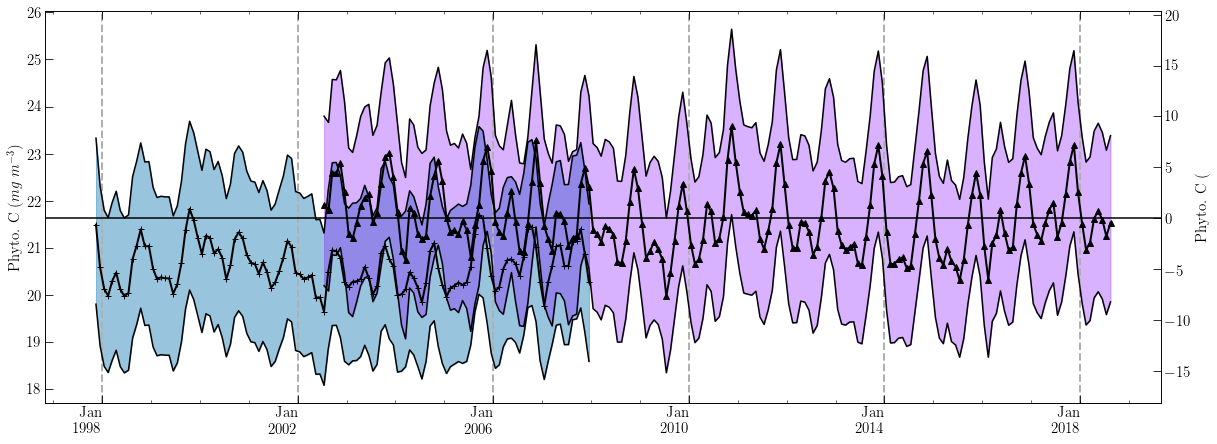

In [38]:
f, ax = pl.subplots(figsize=(20, 8))
make_ax_(ax, ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', )

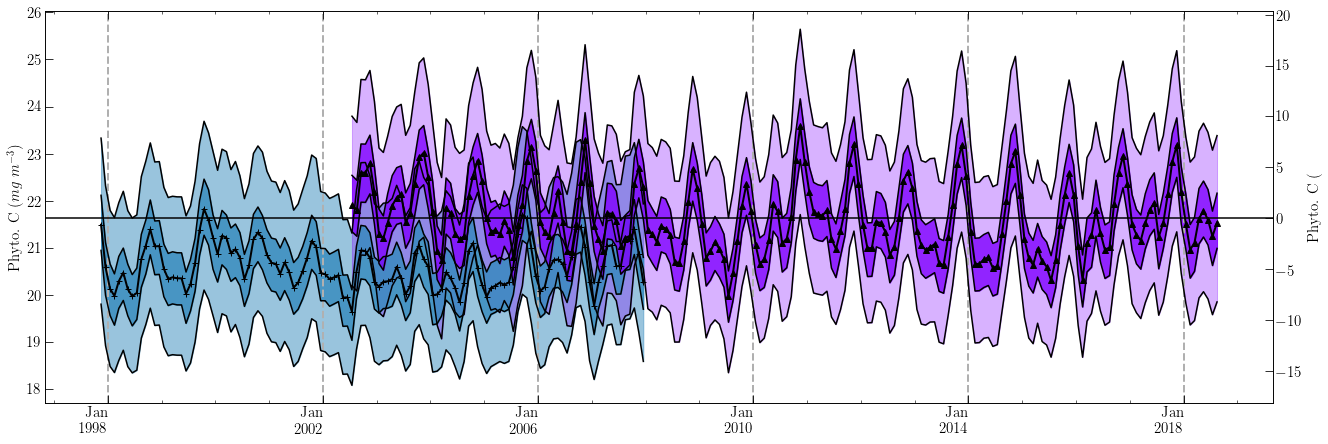

In [39]:
f, ax = pl.subplots(figsize=(22, 8))
make_ax_(ax, ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', inc_50p=True)

In [58]:
pd_mean_ts = pd.read_pickle('./pklJar/df_mean_common_TS_phytoC.pkl')

In [59]:
pd_mean_ts.head()

,mean_phyto_C,sensor_fusion
datetime,,
2002-07-15,20.774066,20.654132
2002-08-15,21.148681,21.106615
2002-09-15,21.772001,21.701805
2002-10-15,21.762827,21.691594
2002-11-15,21.790585,21.687179


In [43]:
df_swf_aqua.head()

,swf_bbp_443_giop_mean,aqua_bbp_443_giop_mean,mean,mean_phyto_C,mean_minus_swf_C,aqua_minus_mean_C,diff,diff_pos,diff_neg
datetime,,,,,,,,,
2002-07-15,0.001632,0.001823,0.001727,20.774066,1.127199,1.127199,0.000192,0.001834,0.001620
2002-08-15,0.001704,0.001815,0.001759,21.148681,0.653078,0.653078,0.000111,0.001866,0.001652
2002-09-15,0.001742,0.001882,0.001812,21.772001,0.825095,0.825095,0.000140,0.001919,0.001705
2002-10-15,0.001741,0.001882,0.001811,21.762827,0.831446,0.831446,0.000141,0.001919,0.001704
2002-11-15,0.001729,0.001899,0.001814,21.790585,1.002229,1.002229,0.000170,0.001921,0.001707


In [62]:
pd_mean_ts.index = pd_mean_ts.index + pd.Timedelta(1, 's')

In [63]:
pd_mean_ts.index

DatetimeIndex(['2002-07-15 00:00:01', '2002-08-15 00:00:01',
               '2002-09-15 00:00:01', '2002-10-15 00:00:01',
               '2002-11-15 00:00:01', '2002-12-15 00:00:01',
               '2003-01-15 00:00:01', '2003-02-15 00:00:01',
               '2003-03-15 00:00:01', '2003-04-15 00:00:01',
               '2003-05-15 00:00:01', '2003-06-15 00:00:01',
               '2003-07-15 00:00:01', '2003-08-15 00:00:01',
               '2003-09-15 00:00:01', '2003-10-15 00:00:01',
               '2003-11-15 00:00:01', '2003-12-15 00:00:01',
               '2004-01-15 00:00:01', '2004-02-15 00:00:01',
               '2004-03-15 00:00:01', '2004-04-15 00:00:01',
               '2004-05-15 00:00:01', '2004-06-15 00:00:01',
               '2004-07-15 00:00:01', '2004-08-15 00:00:01',
               '2004-09-15 00:00:01', '2004-10-15 00:00:01',
               '2004-11-15 00:00:01', '2004-12-15 00:00:01',
               '2005-01-15 00:00:01', '2005-02-15 00:00:01',
               '2005-03-

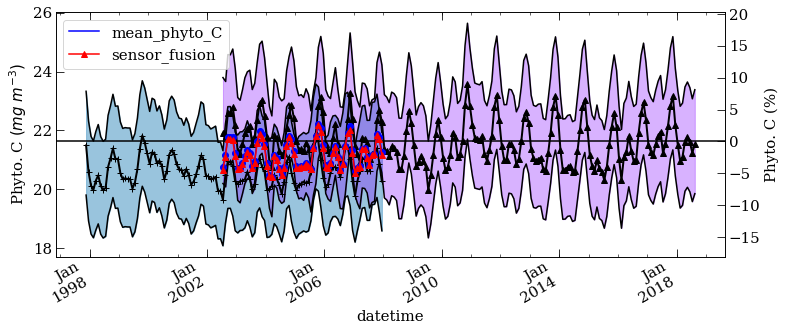

In [66]:
rcParams['text.usetex'] = False
f, ax = pl.subplots(figsize=(12, 5))

make_ax_(ax, ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', )
pd_mean_ts.plot(y='mean_phyto_C', ax=ax, color='blue', marker='o')
pd_mean_ts.plot(y='sensor_fusion', ax=ax, color='red', marker='^')

#df_swf_aqua.plot(y='mean_phyto_C', color='orange', ax=ax, marker='s')
#ax.axhline(y=pd_mean_ts.iloc[0,0])


In [82]:
pd_mean_ts.mean_phyto_C.mean(), pd_mean_ts.sensor_fusion.mean(), df_swf_aqua.mean_phyto_C.mean()

(21.19775666855994, 21.148816462122063, 21.197756668559943)

In [15]:
df_swf['adjusted_phyto_C'] = df_swf.phyto_C_mean + df_swf_aqua.mean_minus_swf_C.mean()

In [16]:
df_aqua['adjusted_phyto_C'] = df_aqua.phyto_C_mean - df_swf_aqua.aqua_minus_mean_C.mean()

In [86]:
df_all = pd.concat(
                   (
                    df_swf['adjusted_phyto_C'].resample('MS', loffset=pd.Timedelta(14, 'd')).first(),
                    df_aqua['adjusted_phyto_C'].resample('MS', loffset=pd.Timedelta(14, 'd')).first(),
                   ),axis=1)

In [87]:
df_all['phyto_C_mean'] = df_all.mean(axis=1)

In [88]:
df_all.head()

,adjusted_phyto_C,adjusted_phyto_C,phyto_C_mean
datetime,,,
1997-11-15,22.120413,NaN,22.120413
1997-12-15,21.218630,NaN,21.218630
1998-01-15,20.758506,NaN,20.758506
1998-02-15,20.610071,NaN,20.610071
1998-03-15,20.920938,NaN,20.920938


In [89]:
df_all.insert(0, 'swf_phyto_C_mean',
              df_swf.phyto_C_mean.resample('MS', loffset=pd.Timedelta(14, 'd')).first())

In [90]:
df_all.insert(1, 'aqua_phyto_C_mean',
              df_aqua.phyto_C_mean.resample('MS', loffset=pd.Timedelta(14, 'd')).first())

In [91]:
df_all.head()

,swf_phyto_C_mean,aqua_phyto_C_mean,adjusted_phyto_C,adjusted_phyto_C,phyto_C_mean
datetime,,,,,
1997-11-15,21.490657,NaN,22.120413,NaN,22.120413
1997-12-15,20.588875,NaN,21.218630,NaN,21.218630
1998-01-15,20.128751,NaN,20.758506,NaN,20.758506
1998-02-15,19.980316,NaN,20.610071,NaN,20.610071
1998-03-15,20.291182,NaN,20.920938,NaN,20.920938


In [98]:
a = df_all.swf_phyto_C_mean.values
b = df_all.phyto_C_mean.values

In [99]:
a

array([21.49065747, 20.58887507, 20.12875081, 19.98031604, 20.2911822 ,
       20.47431448, 20.12334035, 19.97172988, 20.04406536, 20.75812835,
       21.04899934, 21.39150493, 21.03041559, 21.0380608 , 20.55676517,
       20.34058205, 20.37516194, 20.35387296, 20.35269677, 20.02583447,
       20.22907954, 20.68026479, 21.37445022, 21.82563546, 21.58886907,
       21.218135  , 20.86986609, 21.25894868, 21.21460644, 20.88303938,
       20.97207672, 20.79188491, 20.33411302, 20.62533686, 21.17979131,
       21.32881417, 21.20460885, 20.85281138, 20.68249954, 20.66003437,
       20.44902647, 20.69049761, 20.48748777, 20.15509739, 20.264718  ,
       20.50924723, 20.79282586, 21.14921045, 21.01747753, 20.4687864 ,
       20.43879364, 20.33787682, 20.37257433, 20.42115084, 19.94455996,
       19.94949995, 19.64686709, 20.49560346, 20.94690633, 20.93138066,
       20.78835635, 20.26954037, 20.17873875, 20.28071414, 20.29024125,
       20.33787682, 20.59828457, 20.35422581, 20.0178364 , 20.18

In [100]:
b

array([22.12041282, 21.21863042, 20.75850616, 20.61007138, 20.92093755,
       21.10406983, 20.7530957 , 20.60148522, 20.67382071, 21.3878837 ,
       21.67875468, 22.02126027, 21.66017093, 21.66781615, 21.18652052,
       20.97033739, 21.00491728, 20.9836283 , 20.98245212, 20.65558981,
       20.85883489, 21.31002013, 22.00420556, 22.45539081, 22.21862441,
       21.84789034, 21.49962144, 21.88870402, 21.84436178, 21.51279473,
       21.60183207, 21.42164026, 20.96386837, 21.25509221, 21.80954665,
       21.95856952, 21.83436419, 21.48256673, 21.31225489, 21.28978972,
       21.07878181, 21.32025296, 21.11724312, 20.78485274, 20.89447335,
       21.13900258, 21.42258121, 21.7789658 , 21.64723288, 21.09854175,
       21.06854899, 20.96763216, 21.00232967, 21.05090619, 20.57431531,
       20.57925529, 20.77406568, 21.14868117, 21.77200135, 21.76282709,
       21.7905851 , 21.22619187, 20.73184058, 20.73995626, 20.90879787,
       21.11715936, 21.33169583, 21.24883347, 20.7792409 , 20.95

In [101]:
df_all['swf_anom'] = df_all.swf_phyto_C_mean - df_all.phyto_C_mean.mean()
df_all['aqua_anom'] = df_all.aqua_phyto_C_mean - df_all.phyto_C_mean.mean()

In [102]:
df_all.head()

,swf_phyto_C_mean,aqua_phyto_C_mean,adjusted_phyto_C,adjusted_phyto_C,phyto_C_mean,swf_anom,aqua_anom
datetime,,,,,,,
1997-11-15,21.490657,NaN,22.120413,NaN,22.120413,0.426368,NaN
1997-12-15,20.588875,NaN,21.218630,NaN,21.218630,-0.475414,NaN
1998-01-15,20.128751,NaN,20.758506,NaN,20.758506,-0.935538,NaN
1998-02-15,19.980316,NaN,20.610071,NaN,20.610071,-1.083973,NaN
1998-03-15,20.291182,NaN,20.920938,NaN,20.920938,-0.773107,NaN


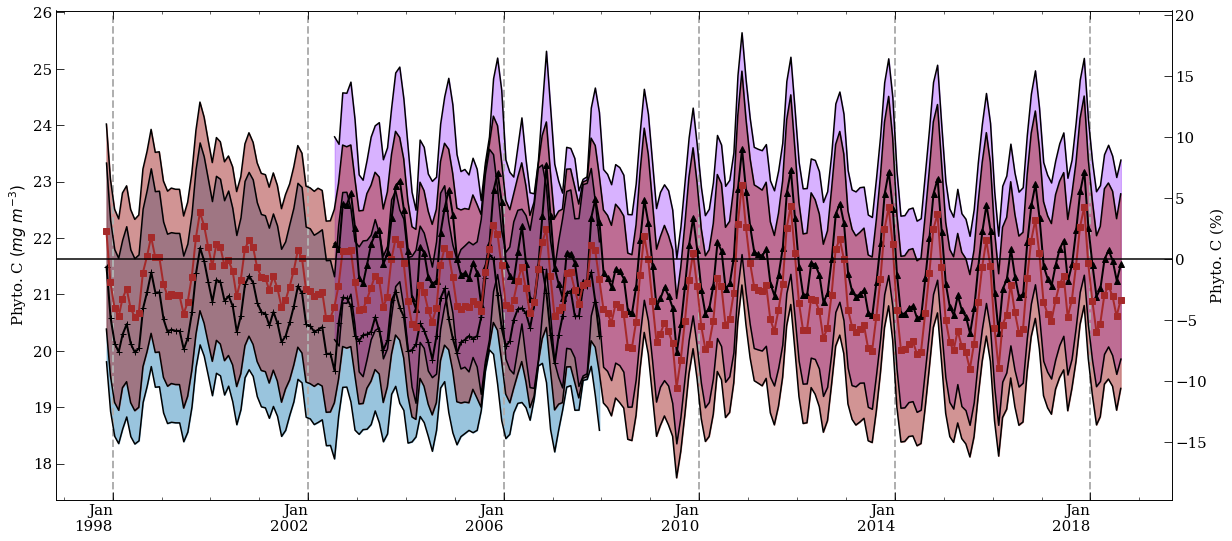

In [69]:
f, ax = pl.subplots(figsize=(20, 10))
#df_all.plot(y='mean', color='brown', ax=ax, legend=False);
make_ax_(ax, ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', show_legend=False, use_mean_df=True)

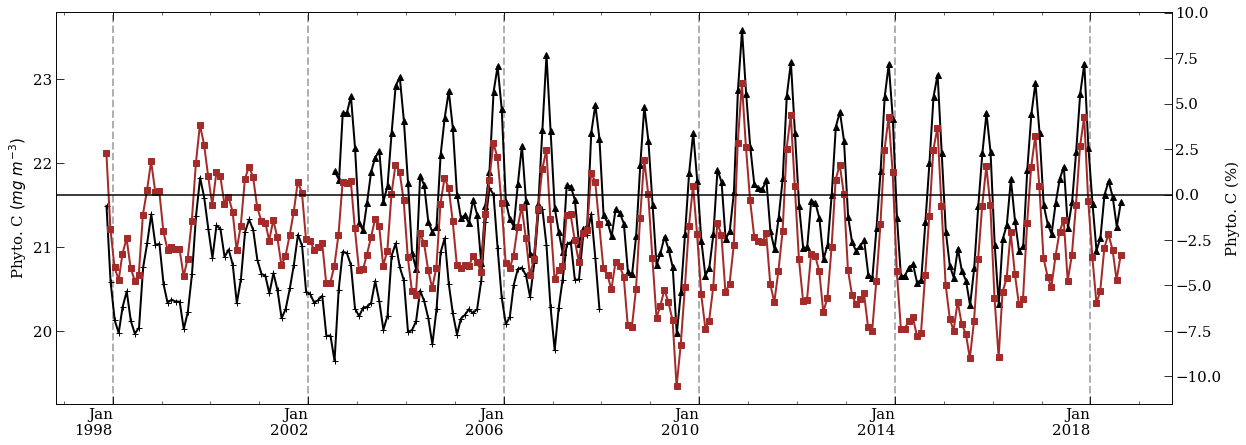

In [70]:
_, ax = pl.subplots(figsize=(20, 8))
make_ax_(ax, ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', show_legend=False, use_mean_df=True, draw_hpd=False)

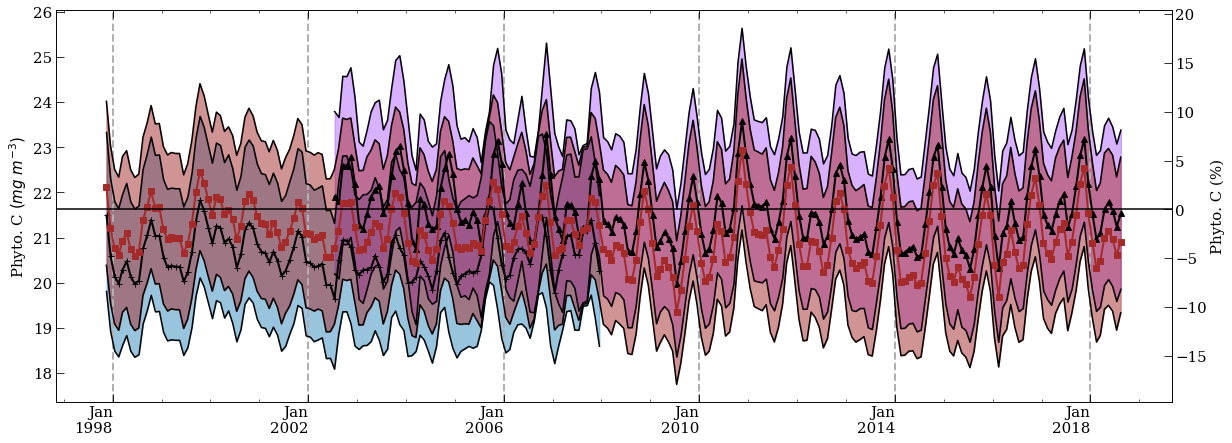

In [71]:
_, ax = pl.subplots(figsize=(20, 8))
make_ax_(ax, ylabel1='Phyto. C $(mg\ m^{-3})$',
          ylabel2='Phyto. C (%)', show_legend=False, use_mean_df=True )

In [72]:
df_all.head()

,swf_phyto_C_mean,aqua_phyto_C_mean,adjusted_phyto_C,adjusted_phyto_C,phyto_C_mean,swf_anom,aqua_anom
datetime,,,,,,,
1997-11-15,21.490657,NaN,22.120413,NaN,22.120413,-0.629755,NaN
1997-12-15,20.588875,NaN,21.218630,NaN,21.218630,-0.629755,NaN
1998-01-15,20.128751,NaN,20.758506,NaN,20.758506,-0.629755,NaN
1998-02-15,19.980316,NaN,20.610071,NaN,20.610071,-0.629755,NaN
1998-03-15,20.291182,NaN,20.920938,NaN,20.920938,-0.629755,NaN


In [111]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 1997-11-15 to 2018-08-15
Data columns (total 7 columns):
swf_phyto_C_mean     122 non-null float64
aqua_phyto_C_mean    194 non-null float64
adjusted_phyto_C     122 non-null float64
adjusted_phyto_C     194 non-null float64
phyto_C_mean         250 non-null float64
swf_anom             122 non-null float64
aqua_anom            194 non-null float64
dtypes: float64(7)
memory usage: 15.6 KB


In [77]:
def make_ax_2(ax, ls='-', ylims=None, mean_C=df_all.phyto_C_mean.mean()):
    df_all.plot(y='swf_anom', marker='+', linestyle=ls, 
                color=plot_colors['swf'], ax=ax, legend=False)
    df_all.plot(y='aqua_anom', marker='^', linestyle=ls,
                 ax=ax, color=plot_colors['aqua'], legend=False)
    #df_mei.plot(y='inv_scaled', marker='D', ax=ax,
                #color=plot_colors['mei'], linestyle='', legend=False)#
    ax.axhline(linestyle='-', linewidth=1.5, color='k')
    ax.grid(axis='x', linestyle='--', linewidth=2)
    ax.set_ylabel('C Anomaly ($mg\ m^{-3}$)') 
    if ylims:
        ax.set_ylim(ylims)
    else:
        ylims = ax.get_ylim()
    ax2 = ax.twinx()
    ax2.set_ylabel('C Anomaly (%)')
    ax2.set_ylim(val_anom_to_perc(ylims[0], mean=mean_C),
                 val_anom_to_perc(ylims[1], mean=mean_C))
    set_time_axis(ax)
    ax.set_xlabel('')

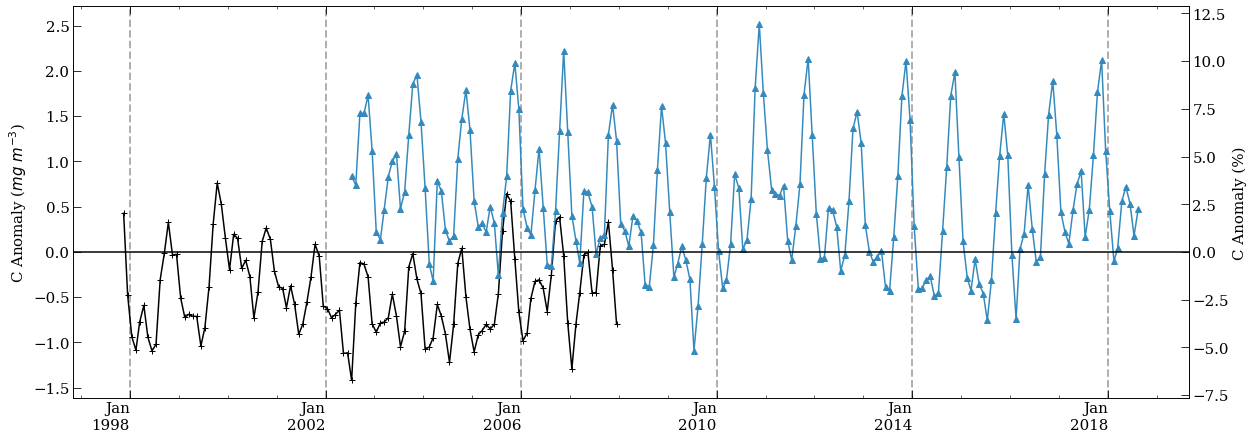

In [103]:
_, ax = pl.subplots(figsize=(20, 8))
make_ax_2(ax)